# HW 1

## Prepared by Danko Danila

## Prerequisites

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams['font.size'] = '16'

## Problem 1

[]

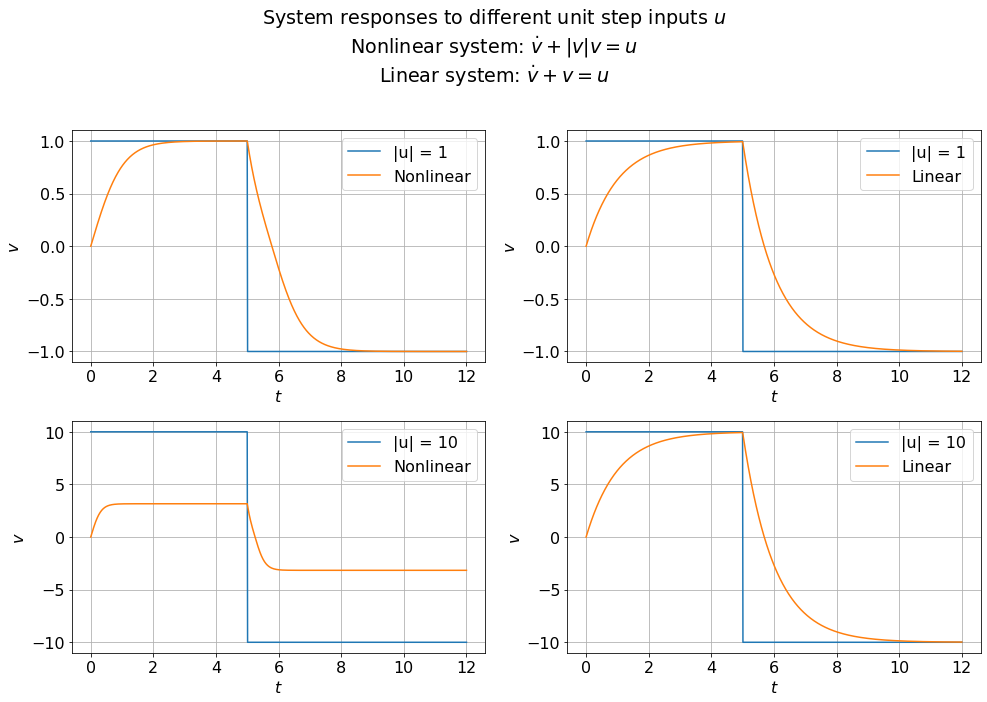

In [2]:
T_START = 0
T_END = 12
N_LIM = 1000
U_AMP = 1
T_LINSPACE = np.linspace(0,T_END,N_LIM)
T_U = 5
US = [U_AMP, U_AMP * 10]


def sys_non_linear(state, t, u):
    v = state
    dv = u(t) - np.abs(v) * v
    return dv

def sys_linear(state, t, u):
    v = state
    dv = u(t) - v
    return dv

def u(t, amplitude):
    m = 1 if t <= T_U else -1
    return amplitude * m

def f (ax, u_amp, sys_f, name):
    y0 = np.array([0.])
    up = np.vectorize(lambda x: u(amplitude=u_amp, t=x))
    ys = odeint(func=sys_f,y0=y0,t=T_LINSPACE, args=(up,))
    ax.plot(T_LINSPACE, up(T_LINSPACE), label=f"|u| = {u_amp}")
    ax.plot(T_LINSPACE, ys,label=name)
    ax.legend()
    ax.grid()
    ax.set_xlabel("$t$")
    ax.set_ylabel("$v$")

fig, axs = plt.subplots(2,2,figsize=(14,10))
fig.suptitle(
    "System responses to different unit step inputs $u$\n" + \
    "Nonlinear system: $\dot{v}+|v|v=u$\n"+ \
    "Linear system: $\dot{v}+v=u$\n")


SYSTEMS = [sys_non_linear, sys_linear]
LABELS = ["Nonlinear", "Linear"]

for i in range(2):
    for j in range(2):
        k = j
        f(ax = axs[i, j], u_amp=US[i], sys_f=SYSTEMS[k], name = LABELS[k])



plt.tight_layout()
plt.plot()

## Problem 2

[]

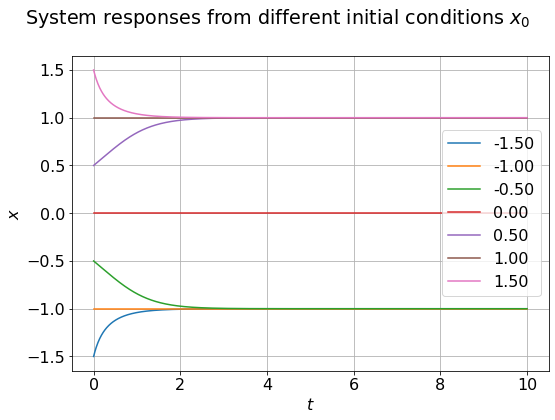

In [3]:
T_START = 0
T_END = 10
N_LIM = 1000
T_LINSPACE = np.linspace(0,T_END,N_LIM)

def sys_2(state, t):
    v = state
    dv = v - v ** 3
    return dv

def f (x_0):
    y0 = np.array([x_0])
    ys = odeint(func=sys_2,y0=y0,t=T_LINSPACE)
    ax.plot(T_LINSPACE, ys,label=f"{x_0:.2f}")
    ax.legend()
    ax.grid()
    ax.set_xlabel("$t$")
    ax.set_ylabel("$x$")

fig, ax = plt.subplots(1,1,figsize=(8,6))
fig.suptitle("System responses from different initial conditions $x_{0}$")

X_START = -1.5
X_END = 1.5
X_STEP = 0.5
XS = np.arange(X_START, X_END + X_STEP, X_STEP)

for x in XS:
    f(x)

plt.tight_layout()
plt.plot()

## Problem 3

[]

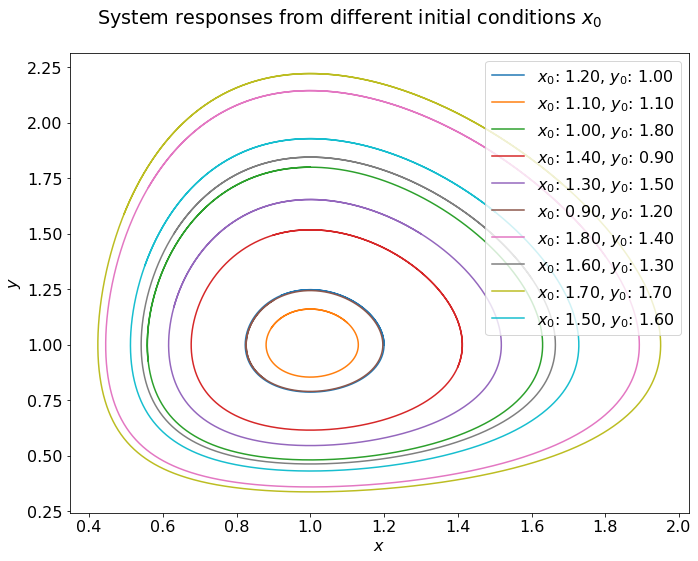

In [4]:
T_START = 0
T_END = 10
N_LIM = 1000
T_LINSPACE = np.linspace(0,T_END,N_LIM)

ALPHA = 2/3
BETA = 2/3
GAMMA = 1
DELTA = 1

def sys_3(state, t):
    x,y = state
    dx = ALPHA * x - BETA * x * y
    dy = DELTA * x * y - GAMMA * y
    return np.array([dx, dy])

def f (c_0):
    cs = odeint(func=sys_3, y0=c_0, t=T_LINSPACE)
    ax.plot(cs[:,0], cs[:,1], label=f"$x_{{0}}$: {c_0[0]:.2f}, $y_{{0}}$: {c_0[1]:.2f}")
    ax.legend()
    ax.grid()
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

fig, ax = plt.subplots(1,1,figsize=(10,8))
fig.suptitle("System responses from different initial conditions $x_{0}$")

C_START = 0.9
C_END = 1.8
C_STEP = 0.1
CS = np.arange(C_START, C_END + C_STEP, C_STEP)

XS = np.random.permutation(CS)
YS = np.random.permutation(CS)

for x,y in zip(XS,YS):
    f(np.array([x,y]))

plt.tight_layout()
plt.plot()

### Answer
Each trajectory is a periodic orbit and doesn't converge to or diverge from a specific trajectory depending on initial conditions

## Problem 4

[]

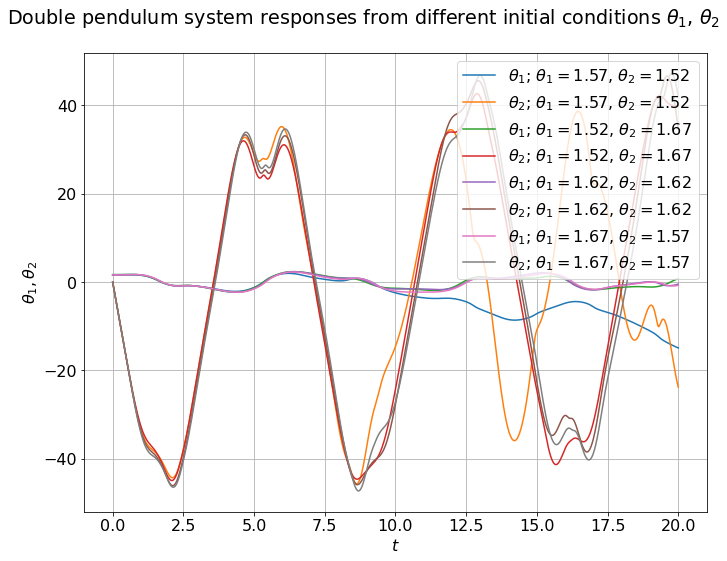

In [5]:
from numpy import sin, cos

T_START = 0
T_END = 20
N_LIM = 2000
T_LINSPACE = np.linspace(0,T_END,N_LIM)

M = 2
L = 3
G = 4

def sys_3(state, t):
    t1,t2,p1,p2 = state
    
    dt1 = 6 / (M * L ** 2) * (2 * p1 - 3 * cos(t1 - t2) * p2) / (16 - 9 * cos (t1 - t2) ** 2)
    dt2 = 6 / (M * L ** 2) * (8 * p2 - 3 * cos(t1 - t2) * p1) / (16 - 9 * cos (t1 - t2) ** 2)

    dp1 = -1/2 * (M * L**2) * (dt1 * dt2 * sin (t1 - t2) + 3 * G / L * sin (t1))
    dp2 = -1/2 * (M * L**2) * (-dt1 * dt2 * sin (t1 - t2) + G / L * sin (t2))

    return np.array([dt1, dt2, dp1, dp2])

def f (c_0):
    cs = odeint(func=sys_3, y0=c_0, t=T_LINSPACE)
    ax.plot(T_LINSPACE, cs[:,1], label=f"$\\theta_{{1}}$; $\\theta_{{1}}={c_0[0]:.2f}$, $\\theta_{{2}}={c_0[1]:.2f}$")
    ax.plot(T_LINSPACE, cs[:,2], label=f"$\\theta_{{2}}$; $\\theta_{{1}}={c_0[0]:.2f}$, $\\theta_{{2}}={c_0[1]:.2f}$")
    ax.legend()
    ax.set_xlabel("$t$")
    ax.set_ylabel("$\\theta_{1},\\theta_{2}$")

fig, ax = plt.subplots(1,1,figsize=(10,8))
fig.suptitle("Double pendulum system responses from different initial conditions $\\theta_{{1}}$, $\\theta_{{2}}$")

C_STEP = 0.05
C_START = np.pi/2 - 0.1 + C_STEP
C_END = np.pi/2 + 0.1 - C_STEP
CS = np.arange(C_START, C_END + C_STEP, C_STEP)

T1S = np.random.permutation(CS)
T2S = np.random.permutation(CS)

for t1,t2 in zip(T1S,T2S):
    f(np.array([t1,t2,0,0]))

plt.grid()
plt.tight_layout()
plt.plot()